# Thermal Denaturation using Fluorescence 
Fluorescence spectra were recorded using excitation at 260 nm and emission at 304 nm (PpiA) or 327 nm (PpiB) for 15-90°C in steps of 0.5°C 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [3]:
spectra = np.genfromtxt('IF_Thermal_PpiA.txt').T
spectra.shape

(8, 151)

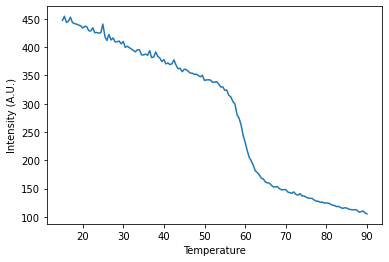

In [3]:
#plot Fluorescence spectra
x1=spectra[0]
y1=spectra[1]
plt.xlabel('Temperature')
plt.ylabel('Intensity (A.U.)')
plt.plot(x1,y1)

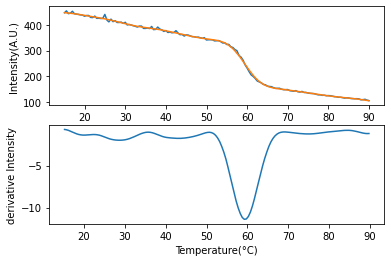

59.23

In [6]:
#Fitting Fluorescence data with smoothed curve using Butterworth filter
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data1 = signal.filtfilt(B,A,y1)

#Plot the derivative of fluorescence over temperature
yprime1 = np.diff(smooth_data1)
xprime1 = x1[:-1]+0.5*np.diff(x1)
fig,(ax1,ax2)=plt.subplots(2)
ax1.plot(x1,y1)
ax1.plot(x1,smooth_data1)
ax2.plot(xprime1,yprime1)
#plt.plot(x,y)
plt.xlabel('Temperature(°C)')
ax1.set_ylabel('Intensity(A.U.)')
ax2.set_ylabel('derivative Intensity')

plt.show()

#Determine the transition temperature at the derivative minimum
np.argmin(yprime1)
xprime1[np.argmin(yprime1)]